# FACE ++ API (Free Version)

It doesn't allow more than 1 call per second <br>
time.sleep(2) may be necessary to use

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches

In [2]:
import requests
import json

In [3]:
http_url="https://api-us.faceplusplus.com/facepp/v3/detect"

key=".."
secret=".."

## Test with one face

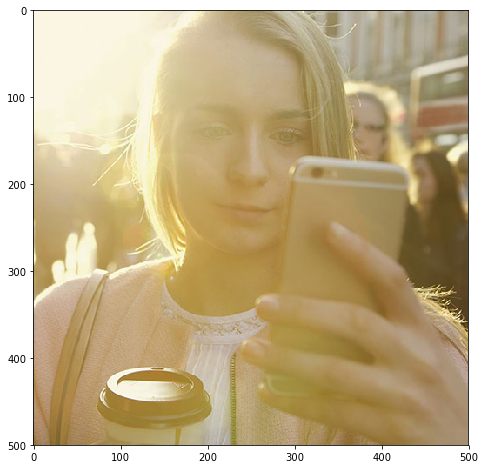

In [4]:
path='1face.jpg'
image = Image.open(path)
plt.figure(figsize=(8,8))
ax = plt.imshow(image)

In [5]:
data={ "api_key": "..","api_secret":".."}
files= {"image_file": open(path, 'rb')}

In [6]:
#To use with local images when having a valid API key
response=requests.post(http_url,data=data,files=files)
req_con=response.content.decode('utf-8')
req_dict = json.loads(req_con)

In [7]:
#This cell no needed when having an API key as is loading the result from a local json file
import json
with open('1face.json') as fd:
    faces_result = json.load(fd)

### Result without adding angle

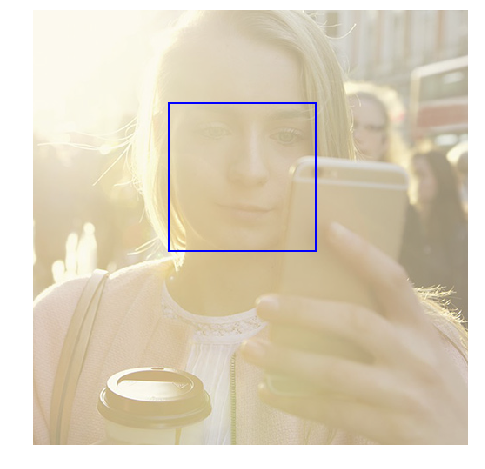

In [8]:
plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)

for face in faces_result['faces']:
    fr = face['face_rectangle']
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
_ = plt.axis("off")

### Result adding angle

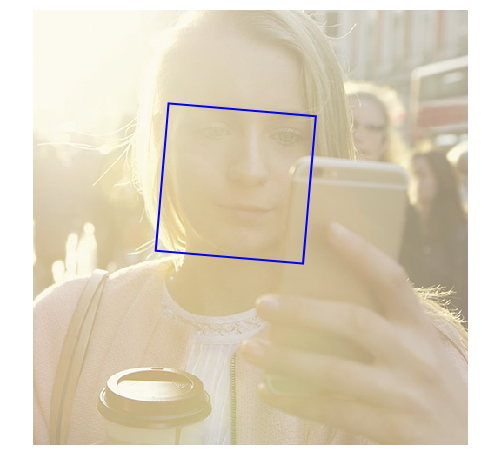

In [9]:
plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)

for face in faces_result['faces']:
    fr = face['face_rectangle']
    origin = (fr["left"], fr["top"])
    roll_angle = face['attributes']['headpose']['roll_angle']
    p = patches.Rectangle(origin, fr["width"], fr["height"], angle=roll_angle, fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
_ = plt.axis("off")

## Test with multiple faces

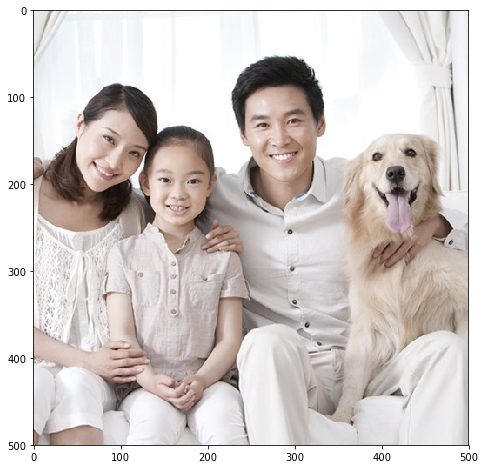

In [10]:
path='3faces1dog.jpg'
image = Image.open(path)
plt.figure(figsize=(8,8))
ax = plt.imshow(image)

In [11]:
files= {"image_file": open(path, 'rb')}

In [12]:
#To use with local images when having a valid API key
response=requests.post(http_url,data=data,files=files)
req_con=response.content.decode('utf-8')
req_dict = json.loads(req_con)

In [13]:
#This cell no needed when having an API key as is loading the result from a local json file
import json
with open('3faces1dog.json') as fd:
    faces_result = json.load(fd)

### Result without adding angle

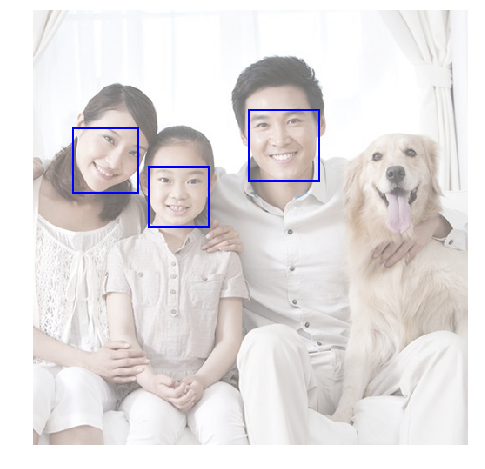

In [14]:
plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)

for face in faces_result['faces']:
    fr = face['face_rectangle']
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
_ = plt.axis("off")

### Result adding angle
I couldn't figure out (yet) the reason why adding angle to the bounding box when having multiple faces doesn't work

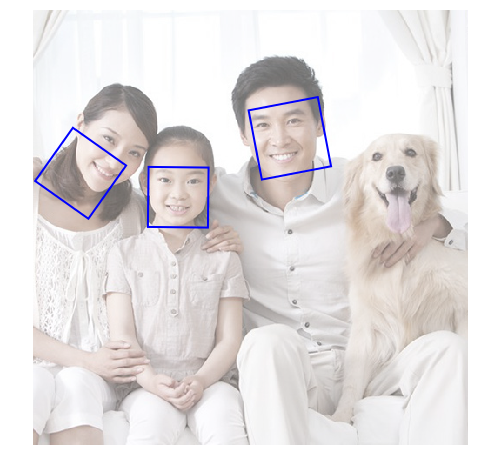

In [15]:
plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)

for face in faces_result['faces']:
    fr = face['face_rectangle']
    origin = (fr["left"], fr["top"])
    roll_angle = face['attributes']['headpose']['roll_angle']
    p = patches.Rectangle(origin, fr["width"], fr["height"],angle = roll_angle, fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
_ = plt.axis("off")